In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\Desktop\Assignments of Machine Learning\house_prices_data_training_data.csv", delimiter=',')
#Return the 1st five rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [3]:
data.shape

(21607, 21)

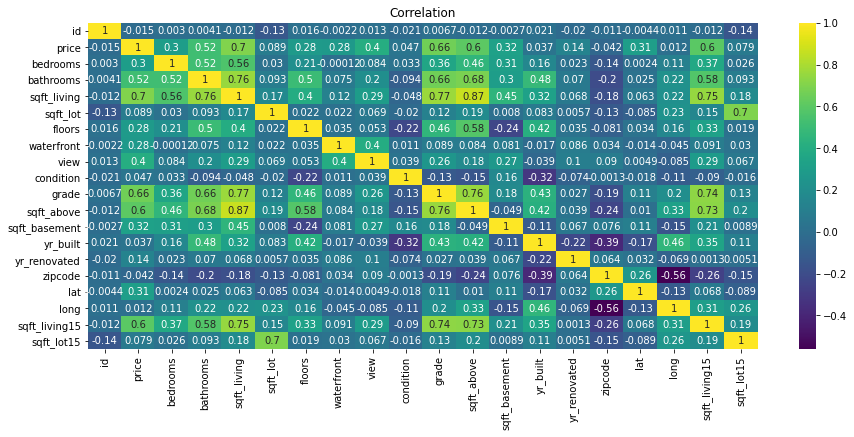

In [4]:
plt.figure(figsize=(15,6))
plt.title('Correlation')
sns.heatmap(data.corr(),annot=True,cmap='viridis',linecolor='white')
plt.show()

In [5]:
data.dropna(inplace=True)
data.drop(['id', 'date','sqft_lot','floors','waterfront','condition','yr_built','yr_renovated','zipcode','long','sqft_lot15'], axis=1)

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3.0,1.00,1180.0,0.0,7.0,1180.0,0.0,47.5112,1340.0
1,538000.0,3.0,2.25,2570.0,0.0,7.0,2170.0,400.0,47.7210,1690.0
2,180000.0,2.0,1.00,770.0,0.0,6.0,770.0,0.0,47.7379,2720.0
3,604000.0,4.0,3.00,1960.0,0.0,7.0,1050.0,910.0,47.5208,1360.0
4,510000.0,3.0,2.00,1680.0,0.0,8.0,1680.0,0.0,47.6168,1800.0
...,...,...,...,...,...,...,...,...,...,...
17994,320000.0,2.0,1.00,1802.0,0.0,7.0,1802.0,0.0,47.7205,1810.0
17995,1990000.0,5.0,3.00,4480.0,0.0,12.0,3420.0,1060.0,47.6275,3220.0
17996,253000.0,2.0,1.00,1310.0,0.0,7.0,940.0,370.0,47.3958,1400.0
17997,630000.0,3.0,2.50,2320.0,0.0,9.0,2320.0,0.0,47.6304,2610.0


In [6]:
data = data.drop(['id', 'date','sqft_lot','floors','waterfront','condition','yr_built','yr_renovated','zipcode','long','sqft_lot15'], axis=1)

In [7]:
X= data.iloc[:, 1:].values
y= data.iloc[:, 0].values

In [8]:
X.shape

(17999, 9)

In [9]:
y.shape

(17999,)

In [10]:
data.head()

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3.0,1.00,1180.0,0.0,7.0,1180.0,0.0,47.5112,1340.0
1,538000.0,3.0,2.25,2570.0,0.0,7.0,2170.0,400.0,47.7210,1690.0
2,180000.0,2.0,1.00,770.0,0.0,6.0,770.0,0.0,47.7379,2720.0
3,604000.0,4.0,3.00,1960.0,0.0,7.0,1050.0,910.0,47.5208,1360.0
4,510000.0,3.0,2.00,1680.0,0.0,8.0,1680.0,0.0,47.6168,1800.0


Text(0.5, 0, 'bedrooms')

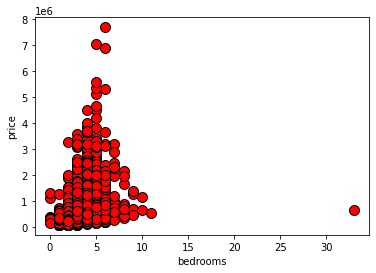

In [11]:
z,y = data["bedrooms"],data["price"]
PricesList = []
BedroomsList = []
PricesList = list(y)
BedroomsList =list(z)

pyplot.plot(BedroomsList, PricesList, 'ro' , ms=10, mec='k')
pyplot.ylabel('price')
pyplot.xlabel('bedrooms')

Text(0.5, 0, 'bathrooms')

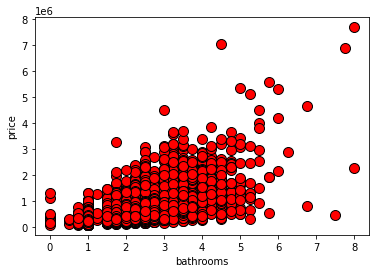

In [12]:
z,y = data["bathrooms"],data["price"]
PricesList = []
bathroomsList = []
PricesList = list(y)
bathroomsList =list(z)

pyplot.plot(bathroomsList, PricesList, 'ro' , ms=10, mec='k')
pyplot.ylabel('price')
pyplot.xlabel('bathrooms')

Text(0.5, 0, 'sqft_living')

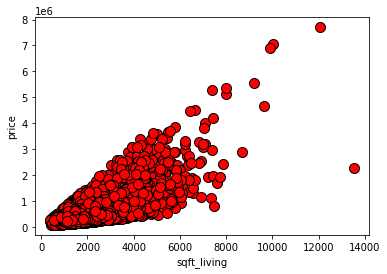

In [13]:
z,y = data["sqft_living"],data["price"]
PricesList = []
sqft_livingList = []
PricesList = list(y)
sqft_livingList =list(z)

pyplot.plot(sqft_livingList, PricesList, 'ro' , ms=10, mec='k')
pyplot.ylabel('price')
pyplot.xlabel('sqft_living')

Text(0.5, 0, 'view')

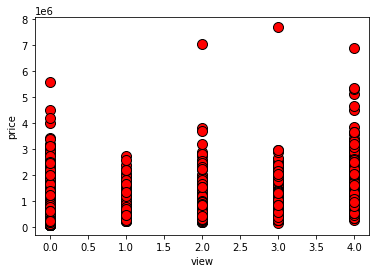

In [14]:
z,y = data["view"],data["price"]
PricesList = []
viewList = []
PricesList = list(y)
viewList =list(z)

pyplot.plot(viewList, PricesList, 'ro' , ms=10, mec='k')
pyplot.ylabel('price')
pyplot.xlabel('view')

Text(0.5, 0, 'grade')

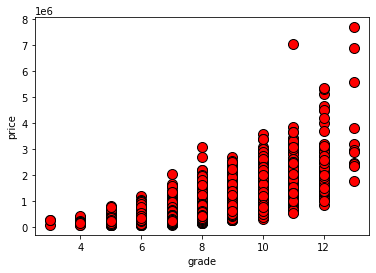

In [15]:
z,y = data["grade"],data["price"]
PricesList = []
gradeList = []
PricesList = list(y)
gradeList =list(z)

pyplot.plot(gradeList, PricesList, 'ro' , ms=10, mec='k')
pyplot.ylabel('price')
pyplot.xlabel('grade')

Text(0.5, 0, 'sqft_above')

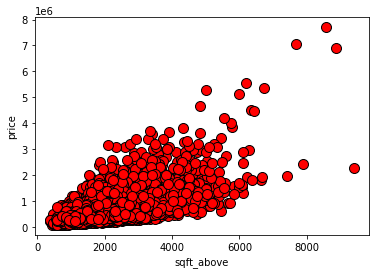

In [16]:
z,y = data["sqft_above"],data["price"]
PricesList = []
sqft_aboveList = []
PricesList = list(y)
sqft_aboveList =list(z)

pyplot.plot(sqft_aboveList, PricesList, 'ro' , ms=10, mec='k')
pyplot.ylabel('price')
pyplot.xlabel('sqft_above')

Text(0.5, 0, 'sqft_basement')

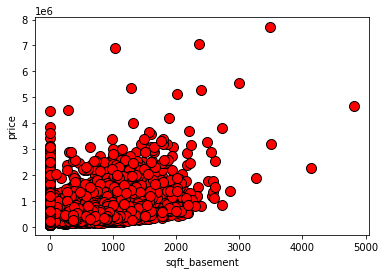

In [17]:
z,y = data["sqft_basement"],data["price"]
PricesList = []
sqft_basementList = []
PricesList = list(y)
sqft_basementList =list(z)

pyplot.plot(sqft_basementList, PricesList, 'ro' , ms=10, mec='k')
pyplot.ylabel('price')
pyplot.xlabel('sqft_basement')

Text(0.5, 0, 'lat')

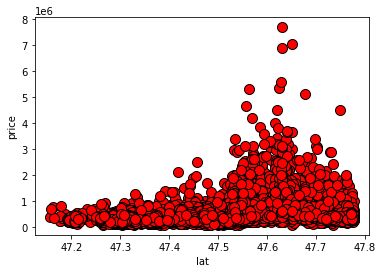

In [18]:
z,y = data["lat"],data["price"]
PricesList = []
latList = []
PricesList = list(y)
latList =list(z)

pyplot.plot(latList, PricesList, 'ro' , ms=10, mec='k')
pyplot.ylabel('price')
pyplot.xlabel('lat')

Text(0.5, 0, 'sqft_living15')

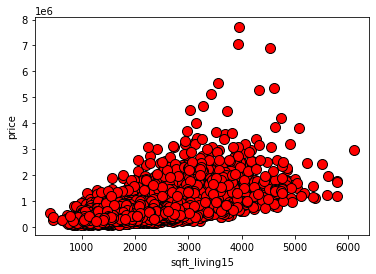

In [19]:
z,y = data["sqft_living15"],data["price"]
PricesList = []
sqft_living15List = []
PricesList = list(y)
sqft_living15List =list(z)

pyplot.plot(sqft_living15List, PricesList, 'ro' , ms=10, mec='k')
pyplot.ylabel('price')
pyplot.xlabel('sqft_living15')

In [20]:
def train_validate_test_split(df, train_percent=0.6, validate_percent=0.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train,validate,test
datatrain, datavalidate, datatest = train_validate_test_split(data, train_percent=0.6, validate_percent=0.2, seed=None)
print(datavalidate.shape)
print(datatrain.shape)
print(datatest.shape)

(3599, 10)
(10799, 10)
(3601, 10)


In [21]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma 
    
    return X_norm, mu, sigma

In [22]:
#featureNormalize(datatrain) showing all details

# call featureNormalize on the loaded data
datatrain_norm, datatrain_mu, datatrain_sigma = featureNormalize(datatrain)

print('Train Computed mean:', datatrain_mu)
print('Train Computed standard deviation:', datatrain_sigma)

Train Computed mean: price            533607.771923
bedrooms              3.368090
bathrooms             2.064427
sqft_living        2055.418465
view                  0.246319
grade                 7.591444
sqft_above         1752.597926
sqft_basement       302.820539
lat                  47.558484
sqft_living15      1970.957218
dtype: float64
Train Computed standard deviation: price            368601.750966
bedrooms              0.941961
bathrooms             0.756542
sqft_living         905.020999
view                  0.782529
grade                 1.168364
sqft_above          805.142997
sqft_basement       449.859964
lat                   0.140621
sqft_living15       672.418993
dtype: float64


In [23]:
#featureNormalize(datavalidate)

# call featureNormalize on the loaded data
datavalidate_norm, datavalidate_mu, datavalidate_sigma = featureNormalize(datavalidate)

print('Validate Computed mean:', datavalidate_mu)
print('Validate Computed standard deviation:', datavalidate_sigma)

Validate Computed mean: price            531880.418450
bedrooms              3.349264
bathrooms             2.053904
sqft_living        2037.035010
view                  0.244512
grade                 7.587941
sqft_above         1738.729091
sqft_basement       298.305918
lat                  47.561992
sqft_living15      1970.780217
dtype: float64
Validate Computed standard deviation: price            366190.324779
bedrooms              0.918758
bathrooms             0.756153
sqft_living         891.152571
view                  0.792930
grade                 1.173468
sqft_above          804.775899
sqft_basement       447.360445
lat                   0.137749
sqft_living15       675.561045
dtype: float64


In [24]:
#featureNormalize(datatest)

# call featureNormalize on the loaded data
datatest_norm, datatest_mu, datatest_sigma = featureNormalize(datatest)
print('Test Computed mean:', datatest_mu)
print('Test Computed standard deviation:', datatest_sigma)

Test Computed mean: price            532667.447098
bedrooms              3.361289
bathrooms             2.060816
sqft_living        2055.816995
view                  0.228825
grade                 7.599556
sqft_above         1752.185782
sqft_basement       303.631214
lat                  47.563611
sqft_living15      1982.527909
dtype: float64
Test Computed standard deviation: price            349640.935140
bedrooms              0.924979
bathrooms             0.767159
sqft_living         907.130936
view                  0.752935
grade                 1.168712
sqft_above          806.723813
sqft_basement       450.185245
lat                   0.138476
sqft_living15       672.937605
dtype: float64


In [25]:
# Add intercept term to X
datatrain = pd.DataFrame(np.concatenate([np.ones((len(datatrain.index), 1)), datatrain_norm], axis=1))
datavalidate = pd.DataFrame(np.concatenate([np.ones((len(datavalidate.index), 1)), datavalidate_norm], axis=1))
datatest = pd.DataFrame(np.concatenate([np.ones((len(datatest.index), 1)), datatest_norm], axis=1))

In [26]:
datatrain

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,2.052058,1.732461,1.897547,1.021613,-0.314773,2.061477,0.766823,0.682834,0.851339,-0.283985
1,1.0,3.218629,0.670846,0.575742,1.121059,-0.314773,2.061477,1.139428,0.216022,0.526353,1.812921
2,1.0,-0.820961,-0.390770,0.575742,-0.757351,-0.314773,-0.506215,-0.475193,-0.673144,-1.292719,-0.373216
3,1.0,0.654886,-0.390770,0.575742,0.469140,-0.314773,0.349682,0.257597,0.482771,0.987876,-0.477317
4,1.0,-0.348907,-0.390770,-0.415611,-0.171729,-0.314773,-0.506215,-0.450352,0.460542,1.538292,0.043191
...,...,...,...,...,...,...,...,...,...,...,...
10794,1.0,-0.137297,-0.390770,0.245291,0.049260,-0.314773,0.349682,-0.524873,1.038500,1.369754,0.191908
10795,1.0,2.594649,1.732461,1.897547,1.728779,2.241042,2.061477,1.288469,1.171875,0.108919,1.069337
10796,1.0,-0.654115,-0.390770,0.575742,0.043735,-0.314773,-0.506215,0.425269,-0.673144,-1.466235,-0.246806
10797,1.0,-0.489981,-0.390770,0.906193,0.126606,-0.314773,-0.506215,0.518420,-0.673144,-1.260719,0.296010


In [27]:
datavalidate

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-0.523991,0.708278,0.589955,-0.019116,-0.308366,-0.501029,-0.830951,1.456754,-0.472536,-0.933713
1,1.0,0.893305,-0.380148,0.589955,0.990812,3.475070,0.351146,1.467826,-0.666813,-1.314645,1.745541
2,1.0,-0.838035,-0.380148,-1.393770,-0.613851,-0.308366,-0.501029,-0.309066,-0.666813,1.300248,-0.030760
3,1.0,-0.499414,0.708278,0.589955,0.272641,-0.308366,-0.501029,0.672573,-0.666813,-0.570540,0.457723
4,1.0,0.438623,0.708278,0.920575,1.877305,-0.308366,1.203322,2.449466,-0.666813,-0.194495,1.449491
...,...,...,...,...,...,...,...,...,...,...,...
3594,1.0,-0.715148,-0.380148,0.259334,0.070656,-0.308366,0.351146,0.448909,-0.666813,-1.297222,1.123836
3595,1.0,1.879131,0.708278,0.589955,1.349898,-0.308366,1.203322,0.399205,1.970881,0.569936,-0.223193
3596,1.0,-0.330103,0.708278,0.920575,0.519513,-0.308366,0.351146,0.945941,-0.666813,-0.237326,-0.460033
3597,1.0,0.267947,1.796704,-0.071287,-0.153773,2.213925,0.351146,-0.023272,-0.264453,0.809502,-0.297205


In [28]:
datatest

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-0.493985,-1.471697,-1.382786,-0.899338,-0.303911,-0.513006,-0.882812,-0.230197,1.028979,-1.177714
1,1.0,0.650189,1.771621,-0.405153,0.666037,-0.303911,-0.513006,-0.101876,1.524636,0.945210,-0.613025
2,1.0,2.423436,1.771621,1.875992,1.790461,-0.303911,1.198280,2.389683,-0.674458,0.678016,0.055684
3,1.0,0.264078,1.771621,0.572481,0.710132,-0.303911,0.342637,0.245207,0.991522,0.319110,0.843276
4,1.0,-0.343688,-0.390591,-0.405153,-0.436339,-0.303911,-0.513006,-0.808437,0.569474,1.220347,-0.523864
...,...,...,...,...,...,...,...,...,...,...,...
3596,1.0,0.693090,0.690515,1.550114,2.253460,-0.303911,1.198280,0.926977,2.879634,1.203016,2.656223
3597,1.0,-0.422340,-0.390591,-1.382786,-1.130837,-0.303911,-0.513006,-1.143125,-0.230197,0.849887,-0.226660
3598,1.0,1.050599,0.690515,1.875992,1.448725,2.352360,0.342637,0.889789,1.324719,0.056249,-0.241520
3599,1.0,-0.736949,-1.471697,-0.405153,-1.241074,-0.303911,-1.368649,-1.019166,-0.674458,-0.297603,-1.311456


In [29]:
datatrain_norm

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
14215,2.052058,1.732461,1.897547,1.021613,-0.314773,2.061477,0.766823,0.682834,0.851339,-0.283985
15667,3.218629,0.670846,0.575742,1.121059,-0.314773,2.061477,1.139428,0.216022,0.526353,1.812921
5373,-0.820961,-0.390770,0.575742,-0.757351,-0.314773,-0.506215,-0.475193,-0.673144,-1.292719,-0.373216
8353,0.654886,-0.390770,0.575742,0.469140,-0.314773,0.349682,0.257597,0.482771,0.987876,-0.477317
4617,-0.348907,-0.390770,-0.415611,-0.171729,-0.314773,-0.506215,-0.450352,0.460542,1.538292,0.043191
...,...,...,...,...,...,...,...,...,...,...
5453,-0.137297,-0.390770,0.245291,0.049260,-0.314773,0.349682,-0.524873,1.038500,1.369754,0.191908
4743,2.594649,1.732461,1.897547,1.728779,2.241042,2.061477,1.288469,1.171875,0.108919,1.069337
7389,-0.654115,-0.390770,0.575742,0.043735,-0.314773,-0.506215,0.425269,-0.673144,-1.466235,-0.246806
2147,-0.489981,-0.390770,0.906193,0.126606,-0.314773,-0.506215,0.518420,-0.673144,-1.260719,0.296010


In [30]:
datavalidate_norm

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
16722,-0.523991,0.708278,0.589955,-0.019116,-0.308366,-0.501029,-0.830951,1.456754,-0.472536,-0.933713
5073,0.893305,-0.380148,0.589955,0.990812,3.475070,0.351146,1.467826,-0.666813,-1.314645,1.745541
12969,-0.838035,-0.380148,-1.393770,-0.613851,-0.308366,-0.501029,-0.309066,-0.666813,1.300248,-0.030760
1881,-0.499414,0.708278,0.589955,0.272641,-0.308366,-0.501029,0.672573,-0.666813,-0.570540,0.457723
5108,0.438623,0.708278,0.920575,1.877305,-0.308366,1.203322,2.449466,-0.666813,-0.194495,1.449491
...,...,...,...,...,...,...,...,...,...,...
8865,-0.715148,-0.380148,0.259334,0.070656,-0.308366,0.351146,0.448909,-0.666813,-1.297222,1.123836
15376,1.879131,0.708278,0.589955,1.349898,-0.308366,1.203322,0.399205,1.970881,0.569936,-0.223193
3782,-0.330103,0.708278,0.920575,0.519513,-0.308366,0.351146,0.945941,-0.666813,-0.237326,-0.460033
16747,0.267947,1.796704,-0.071287,-0.153773,2.213925,0.351146,-0.023272,-0.264453,0.809502,-0.297205


In [31]:
datatest_norm

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
12216,-0.493985,-1.471697,-1.382786,-0.899338,-0.303911,-0.513006,-0.882812,-0.230197,1.028979,-1.177714
8139,0.650189,1.771621,-0.405153,0.666037,-0.303911,-0.513006,-0.101876,1.524636,0.945210,-0.613025
14647,2.423436,1.771621,1.875992,1.790461,-0.303911,1.198280,2.389683,-0.674458,0.678016,0.055684
17207,0.264078,1.771621,0.572481,0.710132,-0.303911,0.342637,0.245207,0.991522,0.319110,0.843276
14326,-0.343688,-0.390591,-0.405153,-0.436339,-0.303911,-0.513006,-0.808437,0.569474,1.220347,-0.523864
...,...,...,...,...,...,...,...,...,...,...
3126,0.693090,0.690515,1.550114,2.253460,-0.303911,1.198280,0.926977,2.879634,1.203016,2.656223
14633,-0.422340,-0.390591,-1.382786,-1.130837,-0.303911,-0.513006,-1.143125,-0.230197,0.849887,-0.226660
17779,1.050599,0.690515,1.875992,1.448725,2.352360,0.342637,0.889789,1.324719,0.056249,-0.241520
13724,-0.736949,-1.471697,-0.405153,-1.241074,-0.303911,-1.368649,-1.019166,-0.674458,-0.297603,-1.311456


In [32]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [33]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        #hypothesis=0
        #theta=0
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

In [34]:
alpha =0.1
num_iters=400
#Training data
Temptrain=datatrain
price=datatrain.iloc[:,1]
Temptrain=Temptrain.drop(columns=1)
theta1 = np.zeros(2)
theta2 = np.zeros(3)
theta3 = np.zeros(4)
theta4 = np.zeros(5)
theta5 = np.zeros(6)
theta6 = np.zeros(7)
theta7 = np.zeros(8)
theta8 = np.zeros(9)
#print(Temptrain.iloc[:,0:2])
#print(price)
theta1, jtrain1 =gradientDescentMulti(Temptrain.iloc[:,0:2],price, theta1, alpha, num_iters)
theta2, jtrain2 =gradientDescentMulti(Temptrain.iloc[:,0:3],price, theta2, alpha, num_iters)
theta3, jtrain3 =gradientDescentMulti(Temptrain.iloc[:,0:4],price, theta3, alpha, num_iters)
theta4, jtrain4 =gradientDescentMulti(Temptrain.iloc[:,0:5],price, theta4, alpha, num_iters)
theta5, jtrain5 =gradientDescentMulti(Temptrain.iloc[:,0:6],price, theta5, alpha, num_iters)
theta6, jtrain6 =gradientDescentMulti(Temptrain.iloc[:,0:7],price, theta6, alpha, num_iters)
theta7, jtrain7 =gradientDescentMulti(Temptrain.iloc[:,0:8],price, theta7, alpha, num_iters)
theta8, jtrain8 =gradientDescentMulti(Temptrain.iloc[:,0:9],price, theta8, alpha, num_iters)

In [ ]:
jtrain1

In [35]:
jtrain1[399:400],jtrain2[399:400],jtrain3[399:400],jtrain4[399:400],jtrain5[399:400],jtrain6[399:400],jtrain7[399:400],jtrain8[399:400]

([0.4562535567027253],
 [0.3607480442601414],
 [0.2514131741514999],
 [0.23109183593202062],
 [0.2156958083107458],
 [0.21808987558090578],
 [0.21270748038015672],
 [0.1818200807665678])

In [37]:
#validating data
Tempvalidate=datavalidate
price=datavalidate.iloc[:,1]
Tempvalidate=Tempvalidate.drop(columns=1)
jval1 = np.zeros(2)
jval2 = np.zeros(3)
jval3 = np.zeros(4)
jval4 = np.zeros(5)
jval5 = np.zeros(6)
jval6 = np.zeros(7)
jval7 = np.zeros(8)
jval8 = np.zeros(9)
#print(Tempvalidate.iloc[:,0:2])
#print(price)
print(theta8)
jval1 =computeCostMulti(Tempvalidate.iloc[:,0:2],price, theta1)
jval2 =computeCostMulti(Tempvalidate.iloc[:,0:3],price, theta2)
jval3 =computeCostMulti(Tempvalidate.iloc[:,0:4],price, theta3)
jval4 =computeCostMulti(Tempvalidate.iloc[:,0:5],price, theta4)
jval5 =computeCostMulti(Tempvalidate.iloc[:,0:6],price, theta5)
jval6 =computeCostMulti(Tempvalidate.iloc[:,0:7],price, theta6)
jval7 =computeCostMulti(Tempvalidate.iloc[:,0:8],price, theta7)
jval8 =computeCostMulti(Tempvalidate.iloc[:,0:9],price, theta8)

0   -6.565267e-14
2   -6.035799e-02
3    1.751020e-02
4    2.371077e-01
5    2.030590e-01
6    2.300690e-01
7    1.981012e-01
8    1.224550e-01
9    2.501516e-01
Name: 1, dtype: float64


In [38]:
print(jval1, jval2, jval3, jval4,jval5,jval6,jval7,jval8)

0.44984461782413154 0.3685970050001038 0.2617134112477748 0.24195469825819826 0.22448553356745796 0.226266737618277 0.2224793194169082 0.19098984354087986


In [39]:
#Testing data
Temptest=datatest
price=datatest.iloc[:,1]
Temptest=Temptest.drop(columns=1)
jtest = np.zeros(9)
#print(Temptest.iloc[:,0:2])
#print(price)
jtest =computeCostMulti(Temptest.iloc[:,0:9],price, theta8)

In [40]:
print(jtest)

0.17861567803770628


In [41]:
price = np.dot(jtest, theta8)

In [42]:
print(price)

[-1.17265964e-14 -1.07808827e-02  3.12759643e-03  4.23511455e-02
  3.62695244e-02  4.10939344e-02  3.53839874e-02  2.18723762e-02
  4.46810054e-02]
